# Data Exploration
## In this notebook we look at the data in detail to understand & highliht the work needed to work with it (e.g. Cleaning, Transforming, Merging...)
### Part of the Udacity Data Scientist nanodegree - Project 1 : Writing a Data Scientist Blog Post


In [277]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

In [278]:
#Loading the data
# Picked up from http://insideairbnb.com/get-the-data/

#df = pd.read_csv('Florence/listings_Sample.csv')
df = pd.read_csv('Florence/listings_Full.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,85820,https://www.airbnb.com/rooms/85820,20220611041213,2022-06-11,Salcio room in B&B La Martellina,A big double bedroom with a canopy bed and two...,"A small village, full of tranquility, gardens,...",https://a0.muscache.com/pictures/41fcd3cd-3557...,470473,https://www.airbnb.com/users/show/470473,...,4.93,4.57,4.93,NaN,t,4,0,4,0,0.16
1,20078945,https://www.airbnb.com/rooms/20078945,20220611041213,2022-06-11,Casa Bonannia O,Casa Bonannia O is a romantic and welcoming tw...,NaN,https://a0.muscache.com/pictures/220fa8c5-7750...,141678952,https://www.airbnb.com/users/show/141678952,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
2,24469,https://www.airbnb.com/rooms/24469,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,...,5.00,4.00,5.00,NaN,t,4,4,0,0,0.03
3,182984,https://www.airbnb.com/rooms/182984,20220611041213,2022-06-11,"Central, quiet near the Old Bridge",<b>The space</b><br />Apartment features (Slee...,San Niccolò is a trendy area with lots of rest...,https://a0.muscache.com/pictures/1167589/d0f1d...,877420,https://www.airbnb.com/users/show/877420,...,4.45,5.00,4.45,NaN,f,1,1,0,0,0.12
4,463942,https://www.airbnb.com/rooms/463942,20220611041213,2022-06-11,BB Casa Schlatter Artist's Atelier. Room #3,"Room 'Gardener', with private bathroom, air co...",Located in a quiet neighborhood at the foot of...,https://a0.muscache.com/pictures/5531440/362cd...,2272298,https://www.airbnb.com/users/show/2272298,...,4.89,4.22,4.78,NaN,f,4,1,3,0,0.09


In [246]:
#Sizing the Dataset
df.shape

(10748, 74)

In [128]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [103]:
#Overview of the data
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.074800e+04,1.074800e+04,1.074800e+04,10748.000000,10748.000000,0.0,10748.000000,10748.000000,10748.000000,0.0,...,8969.000000,8966.000000,8967.000000,8966.000000,8965.000000,10748.000000,10748.000000,10748.000000,10748.000000,9019.000000
mean,5.377944e+16,2.022061e+13,1.063976e+08,24.738463,24.738463,NaN,43.773413,11.254194,3.776889,NaN,...,4.756223,4.838846,4.834730,4.813372,4.693887,11.715296,10.566059,1.038519,0.014142,1.414636
std,1.718570e+17,2.379017e+00,1.250471e+08,99.087858,99.087858,NaN,0.012327,0.019162,2.046700,NaN,...,0.373955,0.294534,0.313584,0.294752,0.370015,26.697693,26.559708,2.618230,0.238605,1.519925
min,2.446900e+04,2.022061e+13,1.565100e+04,0.000000,0.000000,NaN,43.706560,11.131620,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.288065e+07,2.022061e+13,1.211682e+07,1.000000,1.000000,NaN,43.768490,11.245675,2.000000,NaN,...,4.680000,4.800000,4.800000,4.730000,4.610000,1.000000,1.000000,0.000000,0.000000,0.270000
50%,2.686664e+07,2.022061e+13,4.661589e+07,3.000000,3.000000,NaN,43.772510,11.254240,4.000000,NaN,...,4.870000,4.930000,4.940000,4.920000,4.780000,3.000000,2.000000,0.000000,0.000000,0.900000
75%,4.480136e+07,2.022061e+13,1.653978e+08,9.000000,9.000000,NaN,43.777910,11.261662,4.000000,NaN,...,4.990000,5.000000,5.000000,5.000000,4.900000,8.000000,6.000000,1.000000,0.000000,2.050000
max,6.460393e+17,2.022061e+13,4.634048e+08,1507.000000,1507.000000,NaN,43.850230,11.357540,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,154.000000,154.000000,26.000000,6.000000,12.800000


## Identification of data types

In [104]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [96]:
df_float = df.select_dtypes('float').columns
df_object = df.select_dtypes('object').columns
df_int = df.select_dtypes('int64').columns
df_bool = df.select_dtypes('bool').columns
df_datetime = df.select_dtypes('datetime64').columns
print("Floats ="+ str(df_float.shape[0])+ " / Objects ="+str(df_object.shape[0]) +" / Ints ="+str(df_int.shape[0])+" / Bools ="+ str(df_bool.shape[0])+" / Datetimes ="+ str(df_datetime.shape[0]))

Floats =17 / Objects =35 / Ints =23 / Bools =0 / Datetimes =0


## Looking at Missing values

In [105]:
#Looking at Missing values

df_missing = df.columns[df.isnull().any()]
df_missing_num = df[df_missing].isnull().sum()/len(df)
df_missing_num.sort_values(ascending=True, inplace=True)
df_missing_num




name                            0.000186
bathrooms_text                  0.000930
host_location                   0.001116
beds                            0.010514
description                     0.015724
bedrooms                        0.031076
host_acceptance_rate            0.118348
host_response_rate              0.153238
host_response_time              0.153238
review_scores_rating            0.160867
last_review                     0.160867
first_review                    0.160867
reviews_per_month               0.160867
review_scores_accuracy          0.165519
review_scores_cleanliness       0.165519
review_scores_communication     0.165705
review_scores_checkin           0.165798
review_scores_location          0.165798
review_scores_value             0.165891
host_neighbourhood              0.277819
host_about                      0.362207
neighborhood_overview           0.370953
neighbourhood                   0.370953
license                         0.919706
calendar_updated

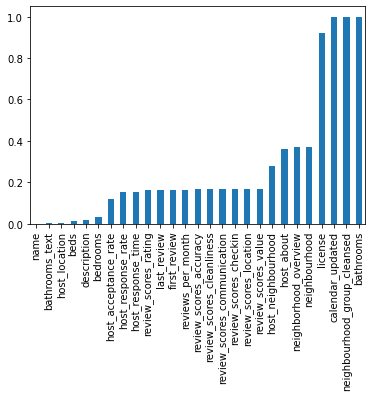

In [122]:
df_missing_num.plot(kind="bar");

## Quick exploration of a few interesting data groups

In [123]:
#Looking at neighbourhoods in details

unique_hoods = df.groupby('neighbourhood_cleansed')['id'].nunique()
unique_hoods.sort_values(ascending=False, inplace=True)

unique_hoods



neighbourhood_cleansed
Centro Storico       7742
Campo di Marte       1148
Rifredi               817
Gavinana Galluzzo     574
Isolotto Legnaia      467
Name: id, dtype: int64

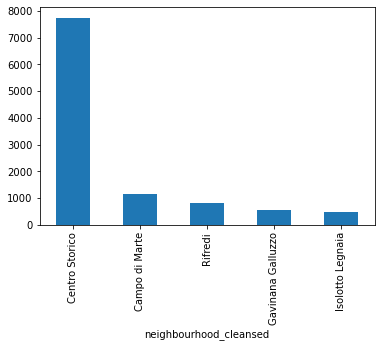

In [124]:
unique_hoods.head(10).plot(kind="bar")

In [293]:
#Looking at amenities in detail

#First we try to get a list of unique amenities

list_amenities =[]
for ind in df.index:

    new_list = (df['amenities'][ind][1:][:-1]).split(",")
    
    for amenity in new_list:
        amenity = (amenity.replace('"','').lower())
        if amenity not in list_amenities:
            list_amenities.append(amenity)

list_amenities





['hair dryer',
 ' hot water',
 ' crib',
 ' wifi',
 ' bbq grill',
 ' host greets you',
 ' tv',
 ' lock on bedroom door',
 ' outdoor furniture',
 ' dryer',
 ' washer',
 ' luggage dropoff allowed',
 ' high chair',
 ' free parking on premises',
 ' outdoor dining area',
 ' essentials',
 ' hangers',
 ' shampoo',
 ' heating',
 ' pool',
 ' breakfast',
 'washer',
 ' air conditioning',
 ' patio or balcony',
 ' long term stays allowed',
 'pack \\u2019n play/travel crib',
 ' paid parking on premises',
 ' hair dryer',
 ' refrigerator',
 ' fire extinguisher',
 ' iron',
 ' dishes and silverware',
 ' kitchen',
 ' microwave',
 ' cooking basics',
 ' coffee maker',
 'hot water kettle',
 ' room-darkening shades',
 ' private entrance',
 ' bathtub',
 ' bed linens',
 ' drying rack for clothing',
 ' stainless steel stove',
 ' oven',
 ' toaster',
 ' cleaning products',
 ' clothing storage: walk-in closet',
 ' closet',
 ' and dresser',
 ' mosquito net',
 ' board games',
 ' fast wifi \\u2013 58 mbps',
 ' freezer

In [333]:
#based on research it looks like only a few amenities are highly searched for by guests: https://www.airbnb.com/resources/hosting-homes/a/the-amenities-guests-want-25

top_amenities_list =['pool','wifi','kitchen','parking','jacuzzi','washer','dryer','airconditioning','heating','petsallowed','selfcheck-in','dedicatedworkspace']

df2 = df.copy()
df2 = df2[['amenities']]
df2['top_amenities'] = ''
for ind in df.index:

    new_list = (df['amenities'][ind][1:][:-1]).split(",")
    found_amenities = []
    for amenity in new_list:
        amenity = (amenity.replace('"','').lower())
        amenity = amenity.replace(" ","")
        if amenity in top_amenities_list:
            if amenity not in found_amenities:
                found_amenities.append(amenity)
                df2.at[ind,'top_amenities'] = ''.join(found_amenities)

#found_amenities
df2.to_csv('amenties_check.csv')

In [367]:
top_amenities_list =['pool','wifi','kitchen','parking','jacuzzi','washer','dryer','airconditioning','heating','petsallowed','selfcheck-in','dedicatedworkspace']

df2 = df.copy()
df2 = df2[['amenities']]
for top in top_amenities_list:
    df2[('has_'+top)] = False


for ind in df.index:

    new_list = (df['amenities'][ind][1:][:-1]).split(",")
    for amenity in new_list:
        amenity = (amenity.replace('"','').lower())
        amenity = amenity.replace(" ","")
        if amenity in top_amenities_list:
            df2.at[ind,('has_'+amenity)] = True

#found_amenities
df2.to_csv('amenties_check.csv')
df2.head()

,amenities,has_pool,has_wifi,has_kitchen,has_parking,has_jacuzzi,has_washer,has_dryer,has_airconditioning,has_heating,has_petsallowed,has_selfcheck-in,has_dedicatedworkspace
0,"[""Hair dryer"", ""Hot water"", ""Crib"", ""Wifi"", ""B...",True,True,False,False,False,True,True,False,True,False,False,False
1,"[""Washer"", ""Air conditioning"", ""Patio or balco...",True,False,False,False,False,True,False,True,False,False,False,False
2,"[""Pack \u2019n play/Travel crib"", ""Paid parkin...",False,True,True,False,False,False,False,True,True,False,False,False
3,"[""Hot water kettle"", ""Room-darkening shades"", ...",False,False,True,False,False,True,False,True,True,False,False,True
4,"[""Air conditioning"", ""Fire extinguisher"", ""Sha...",False,True,False,False,False,False,False,True,True,False,False,False


In [350]:
wifi_perc = df2['amenities'][df2['has_wifi']== True].count()/df2.shape[0]
pool_perc = df2['amenities'][df2['has_pool']== True].count()/df2.shape[0]

print("{:.2%} of properties have wifi and {:.2%} have a pool".format(wifi_perc,pool_perc))

92.55% of properties have wifi and 2.33% have a pool


In [387]:
#Looking at host_verifications

unique_hv_type = df.groupby('host_verifications')['id'].nunique()
unique_hv_type.sort_values(ascending=False, inplace=True)

unique_hv_type

host_verifications
['email', 'phone']                  8549
['email', 'phone', 'work_email']    1675
['phone']                            457
['email']                             41
['phone', 'work_email']               18
[]                                     8
Name: id, dtype: int64

: 

In [381]:
#Looking at room type

unique_room_type = df.groupby('room_type')['id'].nunique()
unique_room_type.sort_values(ascending=False, inplace=True)

unique_room_type


room_type
Entire home/apt    8370
Private room       2168
Hotel room          172
Shared room          38
Name: id, dtype: int64

In [363]:
#Looking at property type

unique_property_type = df.groupby('property_type')['id'].nunique()
unique_property_type.sort_values(ascending=False, inplace=True)

unique_property_type

property_type
Entire rental unit                    5813
Entire condo                          1595
Private room in rental unit            933
Entire loft                            327
Private room in bed and breakfast      327
Entire home                            286
Private room in condo                  277
Room in boutique hotel                 180
Private room in home                   155
Room in hotel                          137
Entire serviced apartment               89
Entire villa                            83
Room in bed and breakfast               82
Entire vacation home                    35
Private room                            29
Entire townhouse                        29
Room in serviced apartment              28
Private room in guest suite             28
Entire guest suite                      27
Private room in serviced apartment      26
Tiny home                               23
Private room in vacation home           21
Private room in villa                   

In [372]:
check_property_types =['entire','room','tent']

df3 = df.copy()
df3 = df3[['property_type']]
df3['property_type_cleaned'] = 'Other'

for ind in df.index:

    new_list = (df['property_type'][ind]).split(" ")
    for word in new_list:
        word = word.lower()
        if word in check_property_types:
            df3.at[ind,'property_type_cleaned'] = word

#found_amenities
df3.head()

,property_type,property_type_cleaned
0,Private room in bed and breakfast,room
1,Entire home,entire
2,Entire rental unit,entire
3,Entire rental unit,entire
4,Private room in bed and breakfast,room


In [373]:
entire_perc = df3['property_type'][df3['property_type_cleaned']== 'entire'].count()/df3.shape[0]
room_perc = df3['property_type'][df3['property_type_cleaned']== 'room'].count()/df3.shape[0]
tent_perc = df3['property_type'][df3['property_type_cleaned']== 'tent'].count()/df3.shape[0]

print("{:.2%} of properties are entire homes and {:.2%} are just a room, and {:.2%} are tents".format(entire_perc,room_perc,tent_perc))

77.45% of properties are entire homes and 22.14% are just a room, and 0.01% are tents


<ipython-input-380-0a0791e07097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_license'][df['license'].isna() == False] = True


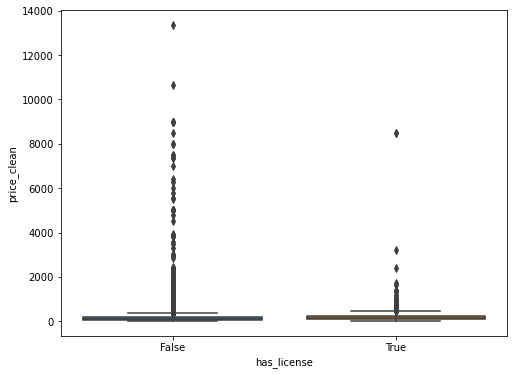

In [380]:
#Looking at license

df['has_license'] = False

df['has_license'][df['license'].isna() == False] = True


var = 'has_license'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)


In [351]:
#Looking at prices in detail

#We remove the dollar sign as first character, remove thousands comma separator and convert to float.

df['price_clean'] = df['price'].str[1:].str.replace(",","").astype(float)

df['price_clean']


0         104.0
1         195.0
2          80.0
3         110.0
4          70.0
          ...  
10743     560.0
10744     218.0
10745      86.0
10746    3814.0
10747     120.0
Name: price_clean, Length: 10748, dtype: float64

In [141]:
df['price_clean'].describe()

count    10748.000000
mean       188.055266
std        453.384055
min          9.000000
25%         70.000000
50%        108.000000
75%        189.000000
max      13375.000000
Name: price_clean, dtype: float64

c:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


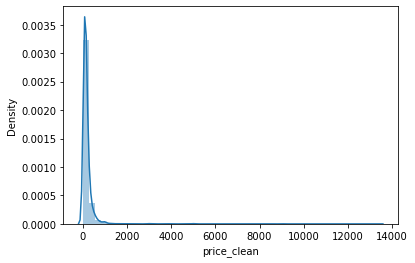

In [143]:
sns.distplot(df['price_clean']);

In [147]:
df['price_clean'].quantile(.9)


325.0

c:\Users\Ali\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


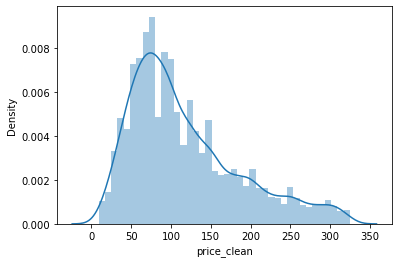

In [153]:
df_price_90 = df[df['price_clean'] <= 325]
 
sns.distplot(df_price_90['price_clean']);

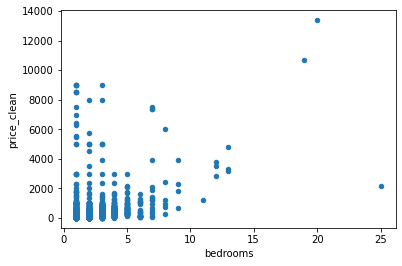

In [176]:
# Looking at how price relates to other parameters

var = 'bedrooms'
data = pd.concat([df['price_clean'],df[var]], axis=1)
data.plot.scatter(x=var, y="price_clean");


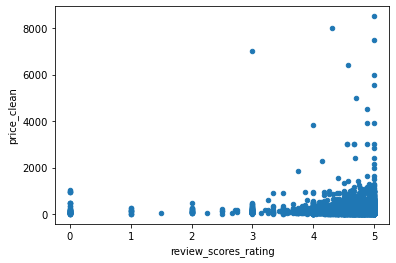

In [166]:

var = 'review_scores_rating' #'bedrooms' 'neighbourhood_cleansed' 'beds'
data = pd.concat([df['price_clean'],df[var]], axis=1)
data.plot.scatter(x=var, y="price_clean");

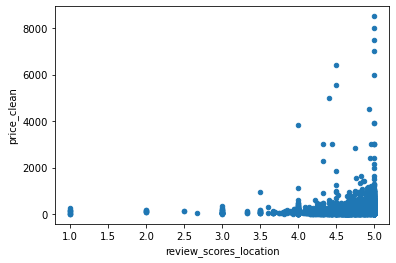

In [169]:
var = 'review_scores_location'
data = pd.concat([df['price_clean'],df[var]], axis=1)
data.plot.scatter(x=var, y="price_clean");

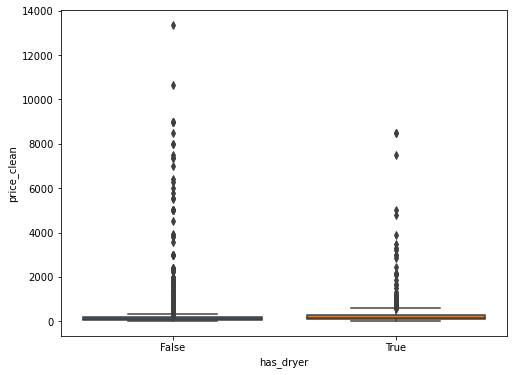

In [362]:
df2['price_clean'] = df['price_clean']
var = 'has_dryer'
data = pd.concat([df2['price_clean'],df2[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)

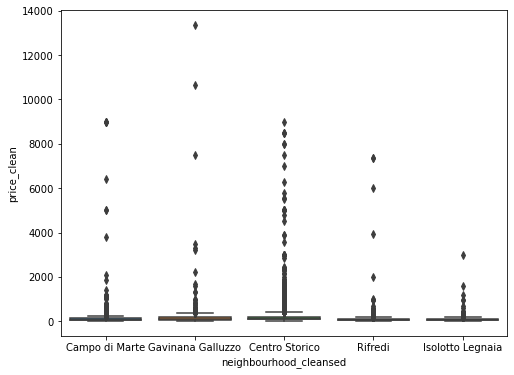

In [173]:
var = 'neighbourhood_cleansed'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)

In [ ]:
'neighbourhood_cleansed'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)

(-0.5, 1.5, 0.0, 14043.3)

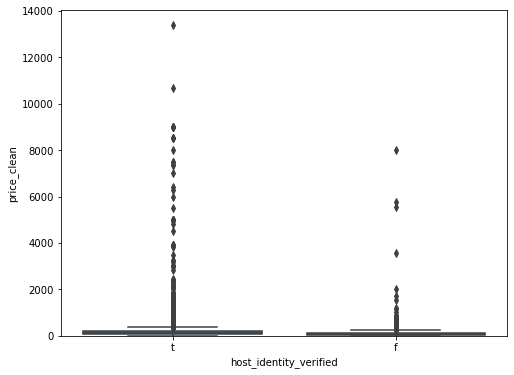

In [171]:
var = 'host_identity_verified'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)
fig.axis(ymin=0)

(-0.5, 57.5, 0.0, 14043.3)

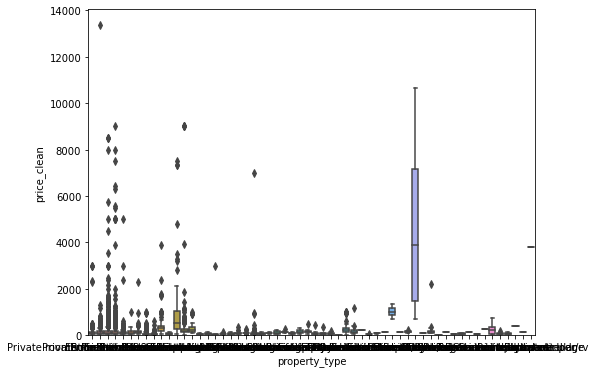

In [179]:
var = 'property_type'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)
fig.axis(ymin=0)

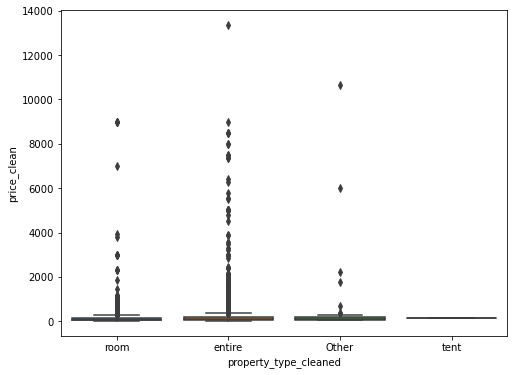

In [374]:
df3['price_clean'] = df['price_clean']
var = 'property_type_cleaned'
data = pd.concat([df3['price_clean'],df3[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)

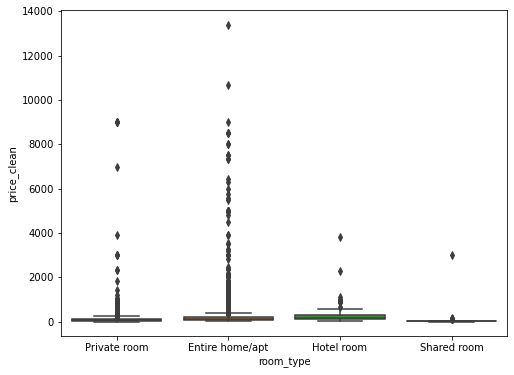

In [375]:
var = 'room_type'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)

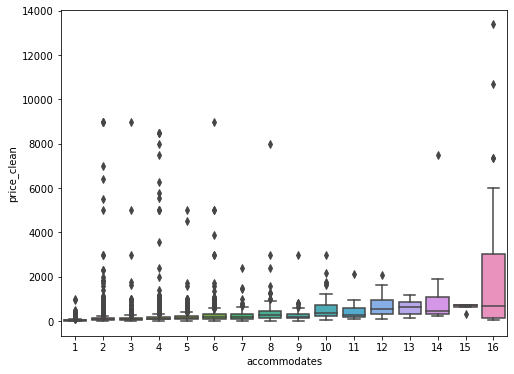

In [276]:
var = 'accommodates'
data = pd.concat([df['price_clean'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="price_clean",data=data)
#fig.axis(ymin=0)

# Not Relevant
'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
       'latitude',
       'longitude',

# Cleaned
'neighbourhood_group_cleansed', 'neighbourhood', 'property_type'
'bathrooms_text', 'bathrooms', 'calendar_last_scraped'
'first_review','last_review'
'amenities', 'license'

# Target
'price'

# Could be cleaned
'host_since',  'calendar_updated', 'host_location',
'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood'
 
       'host_response_time',
       'host_is_superhost', 
       'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 
       'neighbourhood_cleansed','latitude',
       'longitude', 'room_type', 'accommodates','bedrooms', 'beds', 
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'

In [385]:
df['host_location'][34]

'Florence, Toscana, Italy'